# Restaurants Cuisines Analysis

### Introduction
This analysis provides a comprehensive and in-depth understanding of customer cuisine preferences across various restaurants. 
Leveraging Python, the project employs detailed data exploration, statistical analysis, and visualization techniques to uncover meaningful insights.
The analysis focuses on identifying the top three cuisines served by restaurants, highlighting the cities with the highest number of restaurants, and analyzing customer ratings to determine the city with the highest average rating. 
It also examines the distribution of price ranges among restaurants and evaluates the adoption of online delivery systems, including the percentages of online versus offline deliveries.
Further, the analysis explores restaurant ratings, comparing those offering online delivery services with those that do not, and identifies the most common rating ranges and average ratings. 
Additionally, it investigates the correlation between cuisine combinations and ratings, patterns of restaurant locations, and the popularity of restaurant chains.
The insights generated aim to empower key stakeholders — such as restaurant administrators, sales and marketing teams, operations managers, and cuisine experts—with actionable recommendations for informed decision-making and strategic planning to better serve their customers.

### Objectives
The objectives of this analysis are as follows:

1. **Identify Top Cuisines:**
- Determine the three most common cuisisnes in the dataset.
- Calculate the percentage of restaurants offering each of these cuisines.

2. **City Analysis:**
- Identify the city with the highest number of restaurants.
- Calculate the average rating for restaurants in each city.
- Highlight the city with the the highest average restaurant rating.

3. **Examine Price Range:**
-  Visualize the distribution of restaurant price ranges using a histogram.
-  Calculate the percentage of restaurants in each price range category.

4. **Evaluate Online Delivery Options:**
- Calculate the percentage of restaurants offering online delivery services.
- Compare the average ratings of restaurants with and without online delivery options.

5. **Explore Restaurant Trends and Patterns:**
- Analyze the distribution of aggregate ratings to identify the most common rating range.
- Examine popular cuisines combinations amd assess their correlation with higher ratings.
- Identifying geographical trends and clusters of restaurants locations.
- Analyze the pupolarity and ratings of restaurant chains.

In [1]:
# Python libraries utilized for the analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import folium 
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [2]:
# Import the dataset (CSV file) for analysis.
Restaurants_Cuisines = pd.read_csv("C:\\Users\\Hp\Documents\Restaurant_Data.csv")

#### Dataset Description: Restaurants Cuisines Dataset

This dataset is rich in key information to aid an in-depth analysis on the classification of restaurants in different cities based on their cuisines. 
It includes various attributes related to restaurants such as location, average cost, ratings, and services offered. 
The primary objective is to predict the cuisine type of a restaurant using these attributes.

Attributes:

- **Restaurant ID:** Unique identifier for each restaurant.
- **Restaurant Name:** Name of the restaurant.
- **Country Code:** Country code where the restaurant is located.
- **City:** City where the restaurant is situated.
- **Address:** Address of the restaurant.
- **Locality**: General locality of the restaurant.
- **Locality Verbose:** Detailed locality description.
- **Longitude:** Longitude coordinate of the restaurant's location.
- **Latitude:** Latitude coordinate of the restaurant's location.
- **Cuisines:** Type of cuisines offered by the restaurant (target variable).
- **Average Cost for Two:** Average cost for two people dining at the restaurant.
- **Currency:** Currency used for pricing.
- **Has Table Booking:** Binary variable indicating if the restaurant accepts table bookings.
- **Has Online Delivery:** Binary variable indicating if the restaurant offers online delivery.
- **Is Delivering Now:** Binary variable indicating if the restaurant is currently delivering.
- **Switch to Order Menu:** Binary variable indicating if the restaurant has an online menu ordering option.
- **Price Range:** Range indicating the price level of the restaurant's menu items.
- **Aggregate Rating:** Average rating of the restaurant based on customer reviews.
- **Rating Color:** Color code representing the rating level.
- **Rating Text:** Textual representation of the rating level.
- **Votes:** Total number of votes received by the restaurant.

## Exploratory Data Analysis - EDA

In [3]:
## Reviewed the dataset to identify key information, including data types, columns, and other relevant details.
Restaurants_Cuisines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
# I thoroughly examined the dataset for any potential duplicated values in both the columns and rows. 
# The analysis confirmed that there are no duplicated values present.
Restaurants_Cuisines.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Length: 9551, dtype: bool

In [5]:
# To determine the dimensions of the dataset, we found it contains 9,551 rows and 21 columns. You can check this using
Restaurants_Cuisines.shape

(9551, 21)

In [6]:
## This part outlines the characteristics of the key numerical variables and columns in the dataset. 
Restaurants_Cuisines.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
## I examined the dataset for null and missing values. Only the cuisines column contains 9 rows with null or missing values. 
Restaurants_Cuisines.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Data Analysis and Insights

### Top Cuisines Analysis: 
#### Determine the top three most  common cuisines in the dataset. Calculate the percentage of restaurants that serve each of the top cuisines.

In [8]:
# To identify the top three most common cuisines in the dataset, the following steps were performed:
# (a). Count of the number of restaurants serving each cuisine
Cuisines_counts = Restaurants_Cuisines['Cuisines'].value_counts()

In [9]:
Cuisines_counts

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [10]:
# (b). Top three cuisines
Top_Cuisines = Cuisines_counts.head(3)

In [11]:
# (c). Total number of restaurants
Total_Restaurants = len(Restaurants_Cuisines)

In [12]:
# (d). Percentage of restaurants serving each of the top cuisines
Top_Cuisines_Percentage = (Top_Cuisines / Total_Restaurants) * 100
for cuisine, count in Top_Cuisines.items():
    percentage = Top_Cuisines_Percentage[cuisine]
    print(f"Cuisine: {cuisine}, Restaurants: {count}, Percentage: {percentage:.2f}%")

Cuisine: North Indian, Restaurants: 936, Percentage: 9.80%
Cuisine: North Indian, Chinese, Restaurants: 511, Percentage: 5.35%
Cuisine: Chinese, Restaurants: 354, Percentage: 3.71%


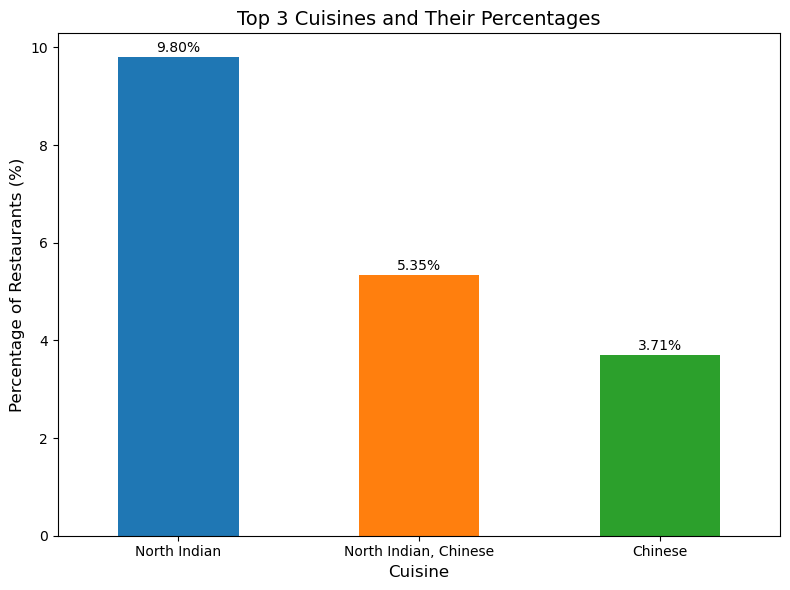

In [13]:
# (e). A visualization of the top three cuisines in the dataset is provided, along with the percentage of restaurants that serve each cuisine.
plt.figure(figsize=(8, 6))
Top_Cuisines_Percentage.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Top 3 Cuisines and Their Percentages", fontsize=14)
plt.xlabel("Cuisine", fontsize=12)
plt.ylabel("Percentage of Restaurants (%)", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
for i, rating in enumerate(Top_Cuisines_Percentage):
    plt.text(i, rating + 0.1, f'{rating:.2f}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

#### Top Cuisines Analysis
The analysis to identify the three most common cuisines and the percentage of restaurants offering each revealed the following:

1.	**North Indian:** The most common cuisine, offered by 936 restaurants, representing 9.80% of all restaurants.
2.	**North Indian & Chinese:** This combination is the second most common, served by 511 restaurants, accounting for 5.35%.
3.	**Chinese:** The third most popular cuisine, featured in 354 restaurants, comprising 3.71%.

These findings suggest that customers are more likely to patronize restaurants offering North Indian, North Indian & Chinese, and Chinese cuisines, highlighting their popularity and potential for higher customer demand.

### City Analysis: 
#### Identify the city with the highest number of restaurants in the dataset. Calculate the average rating for restaurants in each city. Determine the city with the highest average rating.

In [14]:
# 1. Identify the city with the highest number of restaurants
City_Restaurants_Count = Restaurants_Cuisines['City'].value_counts()
City_with_Most_Restaurants = City_Restaurants_Count.idxmax()
Most_Restaurants_Count = City_Restaurants_Count.max()
print(f"City with the highest number of restaurants: {City_with_Most_Restaurants} ({Most_Restaurants_Count} restaurants)")

City with the highest number of restaurants: New Delhi (5473 restaurants)


In [15]:
# 2. Calculate the average rating for restaurants in each city
Average_Ratings_by_City = Restaurants_Cuisines.groupby('City')['Aggregate rating'].mean().round(2).sort_values(ascending=False)
print("\nAverage ratings for each city:")
print(Average_Ratings_by_City)


Average ratings for each city:
City
Inner City          4.90
Quezon City         4.80
Makati City         4.65
Pasig City          4.63
Mandaluyong City    4.62
                    ... 
New Delhi           2.44
Mc Millan           2.40
Montville           2.40
Noida               2.04
Faridabad           1.87
Name: Aggregate rating, Length: 141, dtype: float64


In [16]:
# 3. Determine the city with the highest average rating
City_with_Highest_Avg_Rating = Average_Ratings_by_City.idxmax()
Highest_Avg_Rating = Average_Ratings_by_City.max()
print(f"\nCity with the Highest Average Rating: {City_with_Highest_Avg_Rating} ({Highest_Avg_Rating:.2f} rating)")


City with the Highest Average Rating: Inner City (4.90 rating)


#### City Analysis
The analysis revealed the following insights:

1. **City with the Highest Number of Restaurants:**
    - New Delhi has the largest number of restaurants, totaling 5,473. This is likely due to its cosmopolitan nature and status as a major city center, attracting significant patronage from residents and visitors.
2. **City with the Highest Average Restaurant Rating:**
    - Average restaurant ratings ranged from a high of 4.90 to a low of 1.87.
    - Inner City restaurants achieved the highest average rating of 4.90, indicating exceptional service quality or customer satisfaction in that area.

These findings suggest that New Delhi is a key market for the restaurant industry, while Inner City establishments excel in customer satisfaction, making them benchmarks for quality and service.


### Price Range Distribution: 
#### Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants. Calculate the percentage of restaurants in each price range category.

In [17]:
# 1. Calculate the count of each price range
Price_Range_Counts = Restaurants_Cuisines['Price range'].value_counts()

In [18]:
Price_Range_Counts

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [19]:
# 2. Calculate the percentage of each price range
Price_Range_Percentages = (Price_Range_Counts / Price_Range_Counts.sum()) * 100
Price_Range_Percentages = Price_Range_Percentages.round(2)

In [20]:
Price_Range_Percentages_Result = Price_Range_Percentages.round(2).astype(str) + "%"

In [21]:
# 3. Percentage of Restaurants in each price range
print("Percentage of Restaurants in each Price Range:")
print(Price_Range_Percentages_Result)

Percentage of Restaurants in each Price Range:
Price range
1    46.53%
2    32.59%
3    14.74%
4     6.14%
Name: count, dtype: object


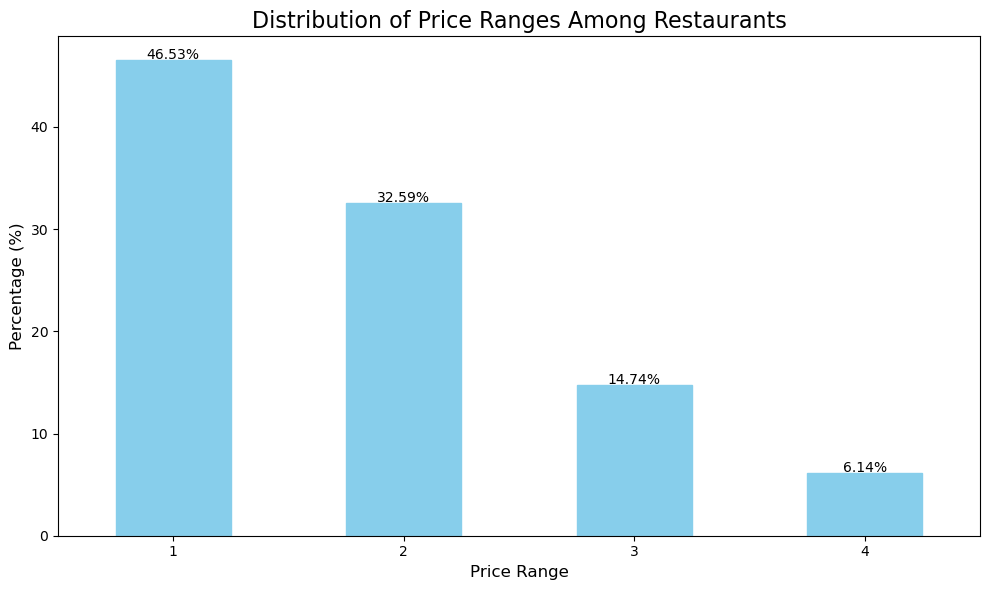

In [22]:
# 4. A bar chart illustrating the distribution of price ranges among restaurants.
plt.figure(figsize=(10, 6))
Price_Range_Percentages.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='skyblue')
plt.title('Distribution of Price Ranges Among Restaurants', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation= 0)
plt.tight_layout()
for i, rating in enumerate(Price_Range_Percentages):
    plt.text(i, rating + 0.1, f'{rating:.2f}%', ha='center', fontsize=10)    
plt.show()

#### Price Range Distribution
This analysis examines the distribution of restaurants across four price range categories (1 to 4) based on a total of 9,551 price range records. The detailed findings are:
- **Price Range 1:** With 4,444 restaurants (46.53%), this is the most prevalent category, highlighting that nearly half of the establishments offer budget-friendly options.
- **Price Range 2:** Comprising 3,113 restaurants (32.59%), this is the second most common category, reflecting a substantial presence of moderately priced establishments.
- **Price Range 3:** Representing 1,408 restaurants (14.74%), this category accounts for a smaller but notable share of mid-range dining options.
- **Price Range 4:** With 586 restaurants (6.14%), this is the least represented category, indicating a limited market for high-end or premium dining.

These findings suggest that the restaurant industry heavily emphasizes affordability, with Price Range 1 dominating the landscape. Moderately priced options (Price Range 2) also hold a significant share, while premium dining (Price Ranges 3 and 4) remains less common, catering to a more niche audience.


### Online Delivery: 
#### Determine the percentage of restaurants that offer online delivery. Compare the average ratings of restaurants with and without online delivery.

In [23]:
### Changed the string values in Has online delivery Column to integer for the statistical analysis of determining the percentagee of restuarants with online delivery of cuisines to the customers in different cities and those restauarants without online delivery model to serve their csutomers demanding for such services
Restaurants_Cuisines['Has Online delivery'] = Restaurants_Cuisines['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [24]:
# 1. Percentage of restaurants offering online delivery
Online_Delivery_Count = Restaurants_Cuisines['Has Online delivery'].sum()
Total_Restaurants = len(Restaurants_Cuisines)
Percentage_Online_Delivery = (Online_Delivery_Count / Total_Restaurants) * 100

In [25]:
# 2. Comparison of average ratings of restaurants with and without online delivery
Average_Ratings = Restaurants_Cuisines.groupby('Has Online delivery')['Aggregate rating'].mean()

In [26]:
# 3. Average ratings of restaurants with or without online delivery
print(f"Percentage of Restaurants Offering Online Delivery: {Percentage_Online_Delivery:.2f}%")
print("\nAverage Ratings of restaurants:")
print("With Online Delivery: {:.2f}".format(Average_Ratings[1]))
print("Without Online Delivery: {:.2f}".format(Average_Ratings[0]))

Percentage of Restaurants Offering Online Delivery: 25.66%

Average Ratings of restaurants:
With Online Delivery: 3.25
Without Online Delivery: 2.47


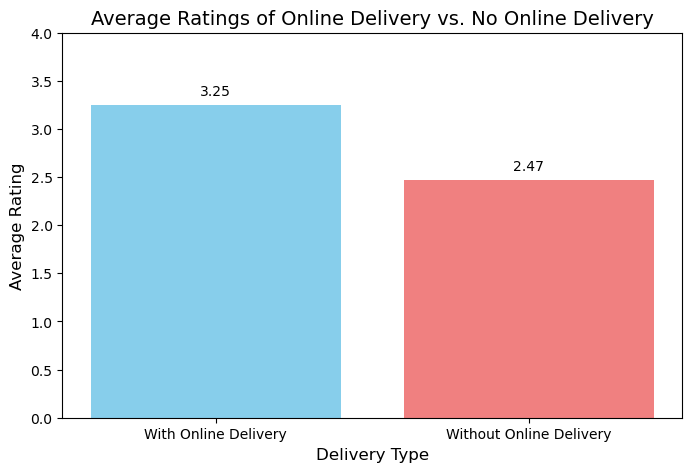

In [27]:
# 4. A bar chart comparing the average ratings of online and other delivery options for various cuisines offered by restaurants.
Categories = ['With Online Delivery', 'Without Online Delivery']
Ratings = [3.25, 2.47]
plt.figure(figsize=(8, 5))
plt.bar(Categories, Ratings, color=['skyblue', 'lightcoral'])
plt.title('Average Ratings of Online Delivery vs. No Online Delivery', fontsize=14)
plt.xlabel('Delivery Type', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

for i, rating in enumerate(Ratings):
    plt.text(i, rating + 0.1, f'{rating:.2f}', ha='center', fontsize=10)

plt.ylim(0, 4)
plt.show()

In [28]:
# 5. The percentage of restaurants that offer online delivery versus those that do not.
Percentage_no_Online_Delivery = 100 - Percentage_Online_Delivery

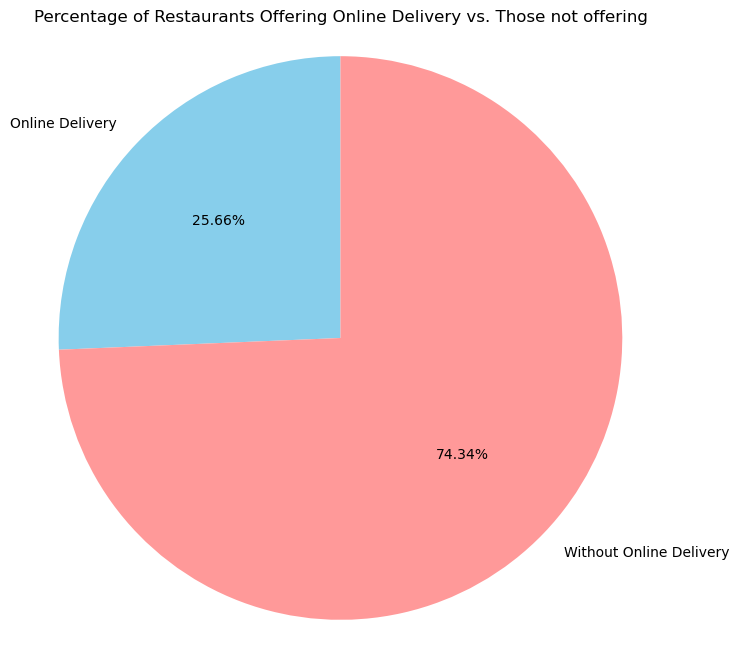

In [29]:
# A pie chart visualizing the distribution of restaurants that offer online delivery versus those that do not.
labels = ['Online Delivery', 'Without Online Delivery']
sizes = [Percentage_Online_Delivery, Percentage_no_Online_Delivery]
colors = ['skyblue', '#ff9999']
explode = (0.1, 0) 
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors,)
plt.title('Percentage of Restaurants Offering Online Delivery vs. Those not offering')
plt.axis('equal')
plt.show()

#### Online Delivery
The analysis revealed the following insights regarding restaurants offering online delivery services:

1. **Customer Ratings and Preferences:**
    - Restaurants with online delivery services have an average rating of 3.25, compared to 2.47 for those without.
    - This suggests that customers tend to favor and rate online delivery-enabled restaurants higher, likely due to the convenience of ordering from home and eliminating the need for travel.
2. **Adoption of Online Delivery:**
    - Only 25.66% of restaurants offer online delivery, while the majority (74.34%) do not provide this option.
    - The limited adoption of online delivery could stem from factors such as socio-economic conditions, customer education levels, cuisine preferences, restaurant locations, or operational challenges.

These findings highlight a significant opportunity for restaurants to enhance their services by adopting online delivery models, which could improve customer satisfaction and expand their market reach. Restaurants leveraging online delivery are likely to have a competitive advantage in attracting and retaining customers.

### Restaurant Ratings Analysis: 
#### Analyze the distribution of aggregate ratings and determine the most common rating range. Calculate the average number of votes received by restaurants.

In [30]:
# 1. Distribution of Aggregate Ratings
Rating_Distribution = Restaurants_Cuisines["Aggregate rating"].value_counts(bins=5, sort=False)
print("Distribution of Aggregate Ratings:")
print(Rating_Distribution)

Distribution of Aggregate Ratings:
(-0.0059, 0.98]    2148
(0.98, 1.96]          3
(1.96, 2.94]       1430
(2.94, 3.92]       4590
(3.92, 4.9]        1380
Name: count, dtype: int64


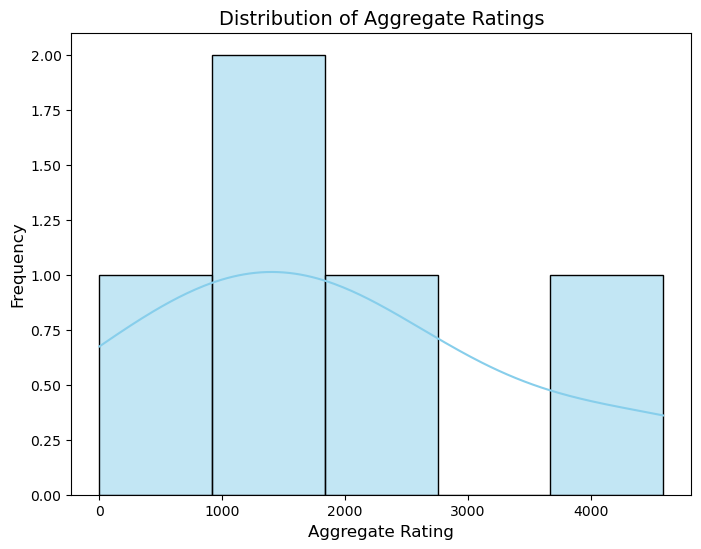

In [31]:
# 2. Distribution of Aggregate Ratings Visualization
plt.figure(figsize=(8, 6))
import warnings
warnings.simplefilter(action = "ignore", category =FutureWarning)
sns.histplot(Rating_Distribution, bins=5, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of Aggregate Ratings", fontsize=14)
plt.xlabel("Aggregate Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [32]:
# 3. Average number of votes received by restaurants
Average_Votes = Restaurants_Cuisines["Votes"].mean()
print(f"\nAverage number of votes received: {Average_Votes:.2f}")


Average number of votes received: 156.91


In [33]:
categories = ['Average Votes']
values = [Average_Votes]

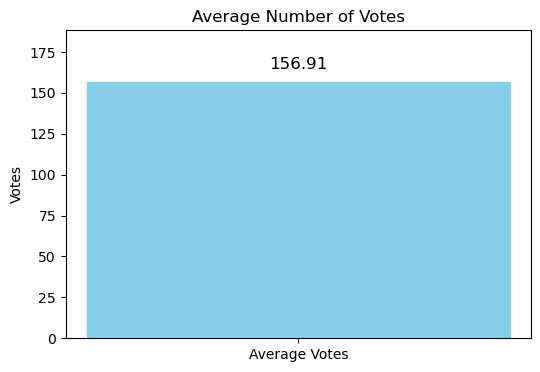

In [34]:
# A bar chart visualizing the average number of votes received by restaurants.
plt.figure(figsize=(6, 4))
plt.bar(categories, values, color='skyblue', edgecolor='skyblue')
plt.ylabel('Votes')
plt.title('Average Number of Votes')
plt.ylim(0, max(values) * 1.2) 
plt.text(0, values[0] + max(values) * 0.05, f'{values[0]:.2f}', ha='center', fontsize=12)
plt.show()

#### Distribution of Aggregate Ratings and Average Votes Analysis
This analysis examines the distribution of aggregate restaurant ratings based on customer feedback on cuisine quality, highlighting the most common rating range. The aggregate ratings span from a minimum of -0.0059 to a maximum of 4.9. Below is the distribution across rating intervals:
- **(-0.0059, 0.98]:** 2,148 ratings
- **(0.98, 1.96]:** 3 ratings
- **(1.96, 2.94]:** 1,430 ratings
- **(2.94, 3.92]:** 4,590 ratings (most common range)
- **(3.92, 4.9]:** 1,380 ratings

The majority of ratings fall within the (2.94, 3.92] range, indicating that many restaurants achieve above-average quality ratings from customers.
Additionally, the analysis reveals that the average number of votes received by restaurants across different cities is 151.91, reflecting customer engagement levels in providing feedback on dining experiences.

### Cuisine Combination: 
#### Identify the most common combinations of cuisines in the dataset. Determine if certain cuisine combinations tend to have higher ratings.

In [35]:
# To identify the most common cuisine combinations in the dataset, the following steps were followed:
# (a) Assuming 'cuisine_column' contains cuisine combinations separated by comma
Restaurants_Cuisines['Cuisines_List'] = Restaurants_Cuisines['Cuisines'].str.split(',')

In [36]:
# (b) Combinations of cuisines
All_Combinations = Restaurants_Cuisines['Cuisines_List'].apply(lambda x: list(combinations(sorted(x), 2)) if isinstance(x, list) else [])

In [37]:
# (c) Flatten the list and count occurrences of each combination
Combination_Counts = pd.Series([item for sublist in All_Combinations for item in sublist]).value_counts()

In [38]:
# (d) Add this information back to the DataFrame
Restaurants_Cuisines['Combinations'] = All_Combinations

In [39]:
# (e) Average rating for each combination
Ratings_per_Combination = (
    Restaurants_Cuisines.explode('Combinations')
    .dropna(subset=['Combinations'])
    .groupby('Combinations')['Aggregate rating']
    .mean()
    .sort_values(ascending=False))

In [40]:
# (f) Output results
print("Most Common Cuisine Combinations:")
print(Combination_Counts.head(10))

Most Common Cuisine Combinations:
( Chinese, North Indian)         1314
( Mughlai, North Indian)          689
( Chinese,  Mughlai)              323
( Fast Food, North Indian)        296
( Chinese,  North Indian)         268
( South Indian, North Indian)     258
( Desserts, Bakery)               254
( Continental, North Indian)      249
( Chinese,  Fast Food)            234
( Chinese,  South Indian)         214
Name: count, dtype: int64


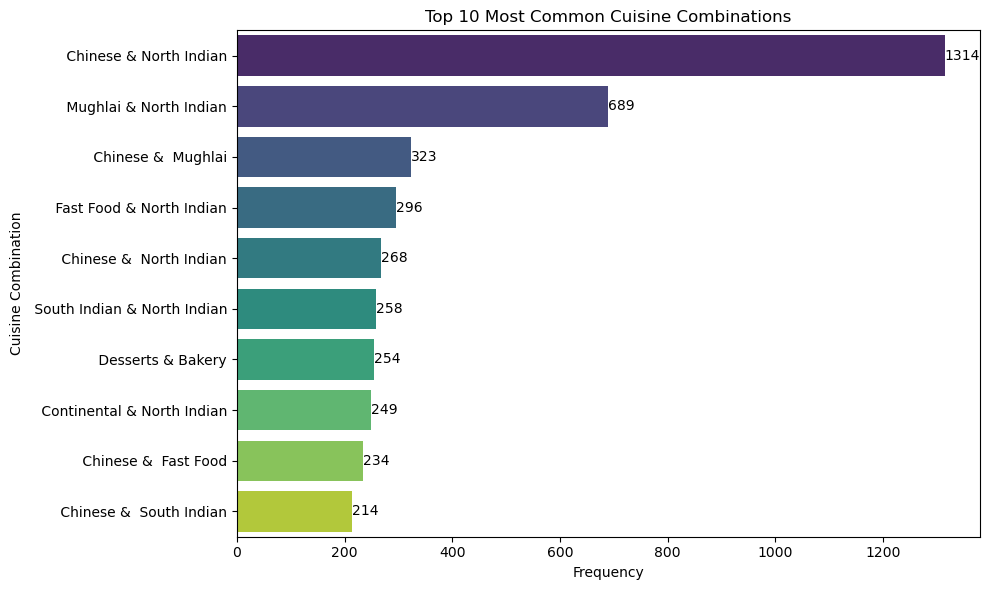

In [41]:
# (g) A bar plot visualizing the most common cuisine combinations.
Top_Combinations = Combination_Counts.head(10)
plt.figure(figsize=(10, 6))
import warnings
warnings.simplefilter(action = "ignore", category =FutureWarning)
sns.barplot(x=Top_Combinations.values, y=[' & '.join(comb) for comb in Top_Combinations.index], palette='viridis')
plt.title('Top 10 Most Common Cuisine Combinations')
plt.xlabel('Frequency')
plt.ylabel('Cuisine Combination')
plt.tight_layout()
for i, value in enumerate(Top_Combinations.values):
    plt.text(value + 0.5, i, str(value), va='center', fontsize=10)
plt.show()

In [42]:
# (h) Results of cuisines combinations with the highest ratings.
print("\nCuisine Combinations with Highest Ratings:")
print(Ratings_per_Combination.head(10))


Cuisine Combinations with Highest Ratings:
Combinations
( Breakfast,  Southern)     4.9
( Sandwich,  Tea)           4.9
( Bar Food,  Steak)         4.9
( BBQ,  Sandwich)           4.9
( Breakfast, BBQ)           4.9
( Deli, Italian)            4.9
( German, European)         4.9
( Healthy Food, Mexican)    4.9
( Caribbean, American)      4.9
( Indian, European)         4.9
Name: Aggregate rating, dtype: float64


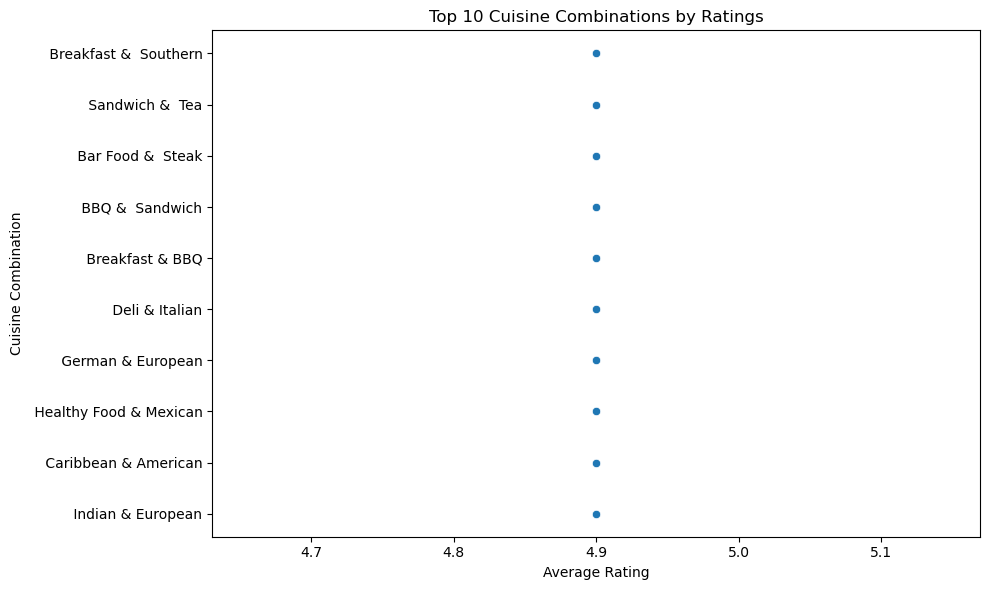

In [43]:
# (i) A scatter plot depicting cuisine combinations that received the highest ratings.
Top_rated_Combinations = Ratings_per_Combination.head(10)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Top_rated_Combinations.values, y=[' & '.join(comb) for comb in Top_rated_Combinations.index])
plt.title('Top 10 Cuisine Combinations by Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Combination')
plt.tight_layout()
plt.show()

### Analysis of Cuisine Combinations
This analysis identifies the ten most common cuisine combinations and those with the highest customer ratings.
1. **Top 10 Most Common Cuisine Combinations:**
    - North Indian & Chinese
    - Mughlai & North Indian
    - Chinese & Mughlai
    - Fast Food & North Indian
    - Chinese & North Indian
    - South Indian & North Indian
    - Desserts & Bakery
    - Continental & North Indian
    - Chinese & Fast Food
    - Chinese & South Indian

The results indicate that North Indian cuisine is the most frequently combined cuisine, highlighting its broad appeal and unique characteristics that attract diners across various restaurants.
    
2. **Cuisine Combinations with the Highest Ratings:**
The following combinations received the highest aggregate rating of 4.9, indicating exceptional customer satisfaction:

    - Breakfast & Southern
    - Sandwich & Tea
    - Bar Food & Steak
    - BBQ & Sandwich
    - Breakfast & BBQ
    - Deli & Italian
    - German & European
    - Healthy Food & Mexican
    - Caribbean & American
    - Indian & European

These highly rated combinations cater to diverse consumption preferences, showcasing their ability to meet or exceed customer expectations across different dining experiences.

### Geographic Analysis: 
#### Plot the locations of restaurants on a map using longitude and latitude coordinates. Identify any patterns or clusters of restaurants in specific areas.

In [44]:
# Mapping the locations of restaurants in various cities.
Avg_Latitude = Restaurants_Cuisines['Latitude'].mean()
Avg_Longitude = Restaurants_Cuisines['Longitude'].mean()

Restaurant_Map = folium.Map(location=[Avg_Latitude, Avg_Longitude], zoom_start=12)

cities = Restaurants_Cuisines['City'].unique()

for city in cities:
    City_group = folium.FeatureGroup(name=city)
    filtered_data = Restaurants_Cuisines[Restaurants_Cuisines['City'] == city]
    for _, row in filtered_data.iterrows():
        folium.Marker(
            [row['Latitude'], row['Longitude']],
            popup=f"Restaurant: {row['Restaurant Name']}"
        ).add_to(City_group)
    Restaurant_Map.add_child(City_group)

folium.LayerControl().add_to(Restaurant_Map)

In [45]:
# An interactive filtered map showing the locations of restaurants in different cities. 
Restaurant_Map.save('Restaurant_Map.html')

In [46]:
# Mapping restaurant clusters in specific areas and cities.
Restaurants_Cluster = Restaurants_Cuisines[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
Restaurants_Cuisines['cluster'] = kmeans.fit_predict(Restaurants_Cluster)

Avg_Latitude = Restaurants_Cuisines['Latitude'].mean()
Avg_Longitude = Restaurants_Cuisines['Longitude'].mean()

Restaurants_Cluster_Map = folium.Map(location=[Avg_Latitude, Avg_Longitude], zoom_start=12)

Cities = Restaurants_Cuisines['City'].unique()

Colours = ['red', 'blue', 'green', 'purple', 'orange']

for city in cities:
    City_group = folium.FeatureGroup(name=city)
    filtered_data = Restaurants_Cuisines[Restaurants_Cuisines['City'] == city]
    for _, row in filtered_data.iterrows():
        Cluster_Colour = Colours[row['cluster'] % len(Colours)] 
        folium.Marker(
            [row['Latitude'], row['Longitude']],
            popup=f"Restaurant: {row['Restaurant Name']}, Cluster: {row['cluster']}",
            icon=folium.Icon(Colour=Cluster_Colour)
        ).add_to(City_group)
    Restaurants_Cluster_Map.add_child(City_group)
folium.LayerControl().add_to(Restaurants_Cluster_Map)

In [47]:
# An interactive filtered map displaying clusters of restaurants in various cities. 
Restaurants_Cluster_Map.save("Restaurants_Cluster_Map.html")

#### Geographical Analysis of Restaurants
This section highlights the geographical distribution of restaurants offering various cuisines across cities in the dataset. Using an interactive filtered map, the analysis visualizes restaurant locations, enabling easy exploration. Additionally, a clustered interactive map was employed to identify and highlight concentrated areas of restaurants, revealing significant clustering patterns in specific regions.

### Restaurant Chains: 
#### Identify if there are any restaurant chains present in the dataset. Analyze the ratings and popularity of different restaurant chains.

In [48]:
# 1. Identify restaurant chains
Chains_Count = Restaurants_Cuisines['Restaurant Name'].value_counts()

In [49]:
# Define chains as restaurants with multiple locations
Restaurants_Chains = Chains_Count[Chains_Count > 1].index.tolist()

In [50]:
# Filter data for restaurant chains
Chains_0f_Restaurants = Restaurants_Cuisines[Restaurants_Cuisines['Restaurant Name'].isin(Restaurants_Chains)]

In [51]:
print(f"Number of Restaurants Chains: {len(Restaurants_Chains)}")

Number of Restaurants Chains: 734


In [53]:
# 2: Analyze ratings and popularity
Chains_Analysis = Chains_0f_Restaurants.groupby('Restaurant Name').agg(
    Avg_Rating=('Aggregate rating', 'mean'),
    Total_Locations=('Restaurant Name', 'count')
).reset_index()
Chains_Analysis['Avg_Rating'] = Chains_Analysis['Avg_Rating'].round(2)

In [54]:
Chains_Analysis = Chains_Analysis.sort_values(by='Avg_Rating', ascending=False)

In [55]:
# Top 10 Restaurants Chains by Average Rating
Top_Chains = Chains_Analysis.sort_values(by ='Avg_Rating', ascending = False).head(10).reset_index(drop =True)

In [56]:
Top_Chains.head(10)

,Restaurant Name,Avg_Rating,Total_Locations
0,Talaga Sampireun,4.90,3
1,Silantro Fil-Mex,4.85,2
2,AB's Absolute Barbecues,4.85,2
3,AB's - Absolute Barbecues,4.82,4
4,Naturals Ice Cream,4.80,2
5,Gymkhana,4.70,2
6,The Cheesecake Factory,4.65,2
7,Dishoom,4.60,2
8,Garota de Ipanema,4.60,2
9,Chili's,4.58,5


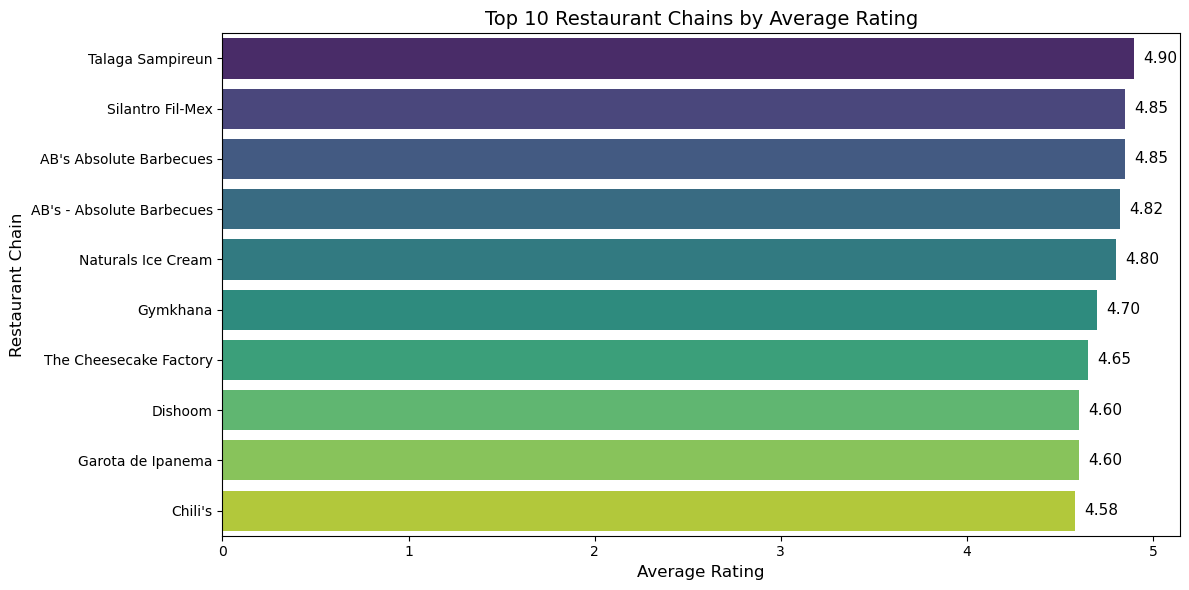

In [57]:
# A bar plot visualizing the top restaurant chains based on average ratings and popularity.
plt.figure(figsize=(12, 6))
sns.barplot(data=Top_Chains, x='Avg_Rating', y='Restaurant Name', palette='viridis')
plt.title('Top 10 Restaurant Chains by Average Rating', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Restaurant Chain', fontsize=12)
for i, (value, name) in enumerate(zip(Top_Chains['Avg_Rating'], Top_Chains['Restaurant Name'])):
    plt.text(value + 0.05, i, f"{value:.2f}", va='center', fontsize=11)
plt.tight_layout()
plt.show()

#### Restaurant Chains Analysis
This analysis reveals that the dataset contains 734 restaurant chains spanning various cities, each with an average rating of 4.0 or higher. This high rating underscores their strong popularity and widespread customer approval.

**Top Restaurant Chains:**
1. Talaga Sampireun
2. Silantro Fil-Mex
3. AB's Absolute Barbecues
4. AB's - Absolute Barbecues
5. Naturals Ice Cream
6. Gymkhana
7. The Cheesecake Factory
8. Dishoom
9. Garota de Ipanema
10. Chili's

These chains stand out for their widespread appeal, consistently high-quality offerings, and strong customer loyalty across different locations.


### Recommendations
The following recommendations are drawn from the analysis:

1. **Top Cuisines**
 - Focus marketing and promotional efforts on the three most common cuisines as they appeal to a significant portion of the customer base.
 - Highlight their popularity in campaigns to draw attention to these offerings.
 - Emphasize these cuisines in underperforming cities to boost restaurant visibility and customer attraction.
2. **City Analysis**
 - Allocate resources and advertising budgets to the city with the highest number of restaurants, as it represents a competitive and lucrative market.
 - Develop strategies to improve customer experience in cities with low average ratings, such as training programs for staff or quality improvement initiatives.
 - Promote cities with the highest average restaurant ratings as culinary destinations to attract food enthusiasts.
3. **Price Range**
 - Use the insights from the price range distribution to tailor pricing strategies that cater to the largest customer segment.
 - Consider expanding restaurant options in underrepresented price range categories to attract diverse customer demographics.
4. **Online Delivery Options**
 - Encourage more restaurants to adopt online delivery services, particularly if those offering delivery demonstrate higher average ratings.
 - Highlight the convenience and quality of restaurants with delivery services in marketing campaigns to attract digital-savvy customers.
 - Use customer feedback to enhance online delivery performance and service satisfaction.
5. **Restaurant Trends and Patterns**
 - Focus on enhancing aggregate ratings within the most common rating range by addressing frequent customer complaints and improving overall service quality.
 - Promote popular cuisine combinations that correlate with higher ratings as unique selling points.
 - Use geographical trend analysis to strategically position new restaurants in high-demand clusters.
 - Explore partnerships with high-performing restaurant chains to leverage their established reputation and attract loyal customers.


### Conclusion
The analysis underscores significant trends and opportunities in the restaurant industry. Key cuisines and cities represent critical growth areas, with potential to attract broader customer bases through targeted strategies. The evaluation of price ranges and online delivery options reveals untapped market segments that could drive growth through innovative solutions. Finally, identifying popular cuisine combinations, geographical clusters, and high-performing chains offers actionable insights for enhancing customer satisfaction, market reach, and revenue generation. By leveraging these findings, stakeholders can implement data-driven strategies to optimize performance and foster long-term success in the competitive restaurant landscape. 